In [ ]:
#!pip3 install --user --upgrade google-cloud-texttospeech

In [ ]:
#!pip install --upgrade google-cloud-speech

In [ ]:
#!pip install google-cloud-speech

In [1]:
key_file = "dl-stfu-668ae575a084.json"

In [2]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file(key_file)


a useful link for the text to speach api in python
https://codelabs.developers.google.com/codelabs/cloud-text-speech-python3#6


In [44]:
import google.cloud.texttospeech as tts
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
import random
import string

In [57]:
def unique_languages_from_voices(voices):
    language_set = set()
    for voice in voices:
        for language_code in voice.language_codes:
            language_set.add(language_code)
    return language_set


def list_languages():
    client = tts.TextToSpeechClient(credentials=credentials) ##need credentials in every client.  annoying
    response = client.list_voices()
    languages = unique_languages_from_voices(response.voices)

    return languages
        
def list_voices(language_code=None):
    client = tts.TextToSpeechClient(credentials=credentials) ##ditto
    response = client.list_voices(language_code=language_code)
    voices = sorted(response.voices, key=lambda voice: voice.name)

    
    return [(voice.name, tts.SsmlVoiceGender(voice.ssml_gender).name) for voice in  voices]
     
        
def text_to_wav(voice_name: str, text: str, speaking_rate = 1.0, pitch = 0.0):
    #speaking rate can be between 0.25 and 4.0.  outside that is err
    #pitch can be between -20.0 and 20.0. but don't mess that much.
    #https://cloud.google.com/python/docs/reference/texttospeech/latest/google.cloud.texttospeech_v1.types.AudioConfig
    #effects_profile_id worth explorign
    language_code = "-".join(voice_name.split("-")[:2])
    text_input = tts.SynthesisInput(text=text)
    voice_params = tts.VoiceSelectionParams(
        language_code=language_code, name=voice_name
    )
    audio_config = tts.AudioConfig(audio_encoding=tts.AudioEncoding.LINEAR16
                                   ,speaking_rate=speaking_rate
                                   ,pitch=pitch)  ##this is where you get speed, pitch, etc.
    client = tts.TextToSpeechClient(credentials=credentials)
    response = client.synthesize_speech(
        input=text_input, voice=voice_params, audio_config=audio_config
    )

    filename = f"{language_code}.wav"
    with open(filename, "wb") as out:
        out.write(response.audio_content)
        print(f'Generated speech saved to "{filename}"')
        
def random_settings_text_to_wav( text: str, voice_list,profile_list):
    ##set these
    voice = random.choice(voice_list) #takes the list as i prepare it in list_voices
    voice_name = voice[0]
    gender = voice[1]
    
    speaking_rate = random.uniform(0.8,1.2) #do i need to reduce digits?
    pitch = random.uniform(-5,5)
    profile = random.choice(profile_list)
    print(gender, profile)
    #speaking rate can be between 0.25 and 4.0.  outside that is err
    #pitch can be between -20.0 and 20.0. but don't mess that much.
    #https://cloud.google.com/python/docs/reference/texttospeech/latest/google.cloud.texttospeech_v1.types.AudioConfig
    #effects_profile_id worth explorign
    
    language_code = "-".join(voice_name.split("-")[:2])
    text_input = tts.SynthesisInput(text=text)
    voice_params = tts.VoiceSelectionParams(
        language_code=language_code, name=voice_name, ssml_gender = gender
    )
    audio_config = tts.AudioConfig(audio_encoding=tts.AudioEncoding.LINEAR16
                                   ,speaking_rate=speaking_rate
                                   ,pitch=pitch
                                  , effects_profile_id = [profile] #this appears to be causing errors.
                                  )  ##this is where you get speed, pitch, etc.
    client = tts.TextToSpeechClient(credentials=credentials)
    response = client.synthesize_speech(
        input=text_input, voice=voice_params, audio_config=audio_config
    )
    code = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(20)) 
    filename = f"{language_code}_{code}.wav"
    #this needs to be written to a file somewhere. the text, the file name, and the spectrogram too.
    #save the file somewhere, record the file name, and save the spectrogram to numpy.  and save the labels.  cuss or not.  
    
    with open(filename, "wb") as out:
        out.write(response.audio_content)
        print(f'Generated speech saved to "{filename}"')

In [58]:
voice_list = list_voices(language_code="en-us")
voice_list

[('en-US-Neural2-A', 'MALE'),
 ('en-US-Neural2-C', 'FEMALE'),
 ('en-US-Neural2-D', 'MALE'),
 ('en-US-Neural2-E', 'FEMALE'),
 ('en-US-Neural2-F', 'FEMALE'),
 ('en-US-Neural2-G', 'FEMALE'),
 ('en-US-Neural2-H', 'FEMALE'),
 ('en-US-Neural2-I', 'MALE'),
 ('en-US-Neural2-J', 'MALE'),
 ('en-US-News-K', 'FEMALE'),
 ('en-US-News-L', 'FEMALE'),
 ('en-US-News-M', 'MALE'),
 ('en-US-News-N', 'MALE'),
 ('en-US-Standard-A', 'MALE'),
 ('en-US-Standard-B', 'MALE'),
 ('en-US-Standard-C', 'FEMALE'),
 ('en-US-Standard-D', 'MALE'),
 ('en-US-Standard-E', 'FEMALE'),
 ('en-US-Standard-F', 'FEMALE'),
 ('en-US-Standard-G', 'FEMALE'),
 ('en-US-Standard-H', 'FEMALE'),
 ('en-US-Standard-I', 'MALE'),
 ('en-US-Standard-J', 'MALE'),
 ('en-US-Studio-M', 'MALE'),
 ('en-US-Studio-O', 'FEMALE'),
 ('en-US-Wavenet-A', 'MALE'),
 ('en-US-Wavenet-B', 'MALE'),
 ('en-US-Wavenet-C', 'FEMALE'),
 ('en-US-Wavenet-D', 'MALE'),
 ('en-US-Wavenet-E', 'FEMALE'),
 ('en-US-Wavenet-F', 'FEMALE'),
 ('en-US-Wavenet-G', 'FEMALE'),
 ('en-US-W

In [59]:
profile_id_list = ['wearable-class-device'##	Smart watches and other wearables, like Apple Watch, Wear OS watch
,'handset-class-device'##	Smartphones, like Google Pixel, Samsung Galaxy, Apple iPhone
,'headphone-class-device'##	Earbuds or headphones for audio playback, like Sennheiser headphones
,'small-bluetooth-speaker-class-device'#	Small home speakers, like Google Home Mini
,'medium-bluetooth-speaker-class-device'#	Smart home speakers, like Google Home
,'large-home-entertainment-class-device'#	Home entertainment systems or smart TVs, like Google Home Max, LG TV
,'large-automotive-class-device'#	Car speakers
,'telephony-class-application'#	Interactive Voice Response (IVR) systems
]

In [64]:
cuss_text = "this is a fucking test to see if this bitch can cuss and record with random params.  fuck ass dick bitch."
random_settings_text_to_wav( cuss_text, voice_list,profile_id_list)

FEMALE small-bluetooth-speaker-class-device
Generated speech saved to "en-US_5G8CQA6AJ1IE9YAO4UT7.wav"


In [ ]:
#https://stackoverflow.com/questions/44787437/how-to-convert-a-wav-file-to-a-spectrogram-in-python3

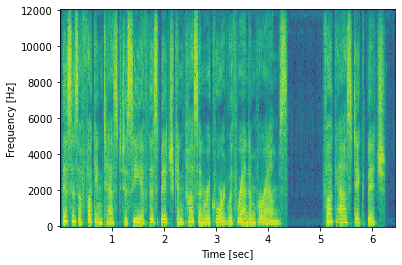

In [69]:


sample_rate, samples = wavfile.read('en-US_5G8CQA6AJ1IE9YAO4UT7.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, np.log(spectrogram)) ##log makes it prettier. for whatever reason.
#plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [66]:
sample_rate,samples

(24000, array([ 0,  0,  0, ..., -2,  1,  5], dtype=int16))

In [71]:
spectrogram, np.log(spectrogram) ##which do we do it on?

(array([[1.5647647e-03, 2.5488185e-03, 2.1419834e-02, ..., 5.9031714e-07,
         4.8636716e-06, 1.6352364e-04],
        [1.0112839e+00, 2.8889984e-02, 4.4565287e-01, ..., 1.1093068e-02,
         8.3665829e-03, 2.8859833e-02],
        [1.5338823e-01, 8.7158042e-01, 3.0095708e-01, ..., 1.5625911e-02,
         7.2892718e-03, 9.3059782e-03],
        ...,
        [3.6486672e-04, 3.2236267e-04, 2.6856178e-05, ..., 8.6425612e-04,
         1.7789898e-03, 7.7426196e-03],
        [3.1965095e-04, 7.5036311e-05, 6.9440430e-05, ..., 3.0675851e-04,
         1.7459429e-03, 7.0238812e-03],
        [8.0131904e-06, 2.2750204e-05, 6.5335611e-05, ..., 1.0047014e-06,
         1.3504036e-04, 2.3017756e-06]], dtype=float32),
 array([[-6.4600201e+00, -5.9721255e+00, -3.8434379e+00, ...,
         -1.4342606e+01, -1.2233717e+01, -8.7185526e+00],
        [ 1.1220686e-02, -3.5442603e+00, -8.0821496e-01, ...,
         -4.5014348e+00, -4.7835097e+00, -3.5453045e+00],
        [-1.8747832e+00, -1.3744713e-01, -1.20

In [68]:
spectrogram.shape

(129, 690)